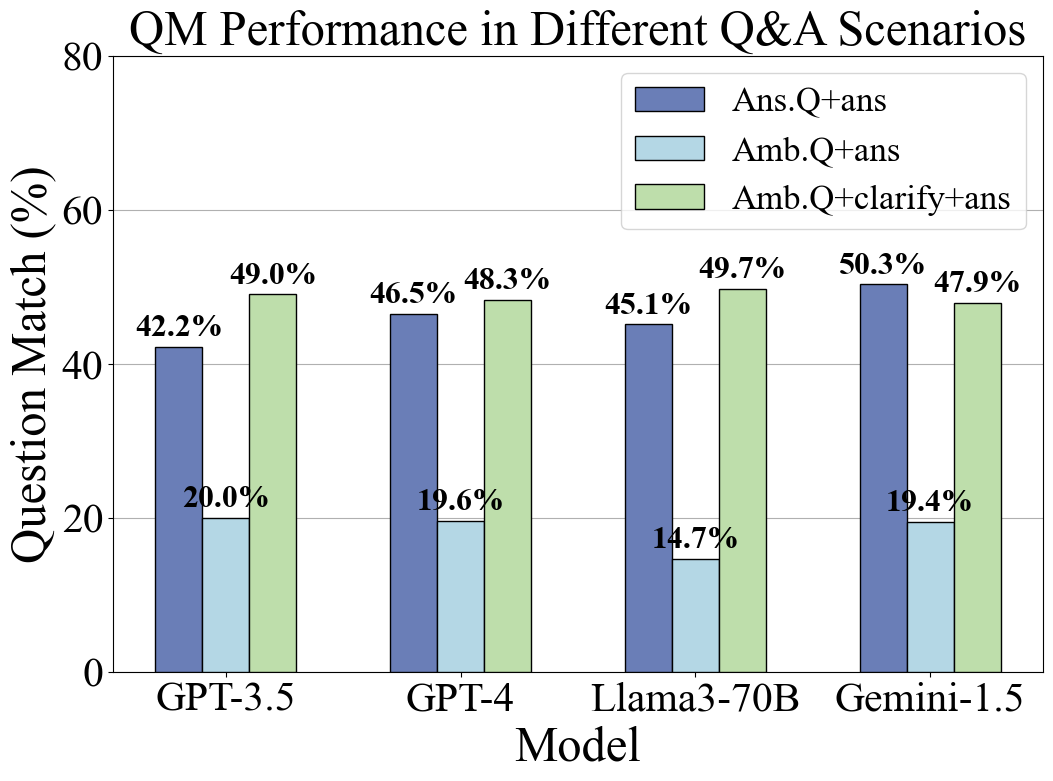

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['GPT-3.5', 'GPT-4', 'Llama3-70B', 'Gemini-1.5']

# Question Match data
# Each model has three data points: Ans.Q, Amb.Q+ans, Amb.Q+clarify+ans
scores = {
    'GPT-4': [46.5, 19.6, 48.3],
    'GPT-3.5': [42.2, 20.0, 49.0],
    'Gemini-1.5': [50.3, 19.4, 47.9],
    'Llama3-70B': [45.1, 14.7, 49.7],
}

# Set font
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 30  # Increase font size

# Plot the chart
fig, ax = plt.subplots(figsize=(12, 8))

# Set the width and positions of the bars
bar_width = 0.2
index = np.arange(len(models))

# Get the data for each category
ans_q = [scores[model][0] for model in models]
amb_q_ans = [scores[model][1] for model in models]
amb_q_clarify_ans = [scores[model][2] for model in models]

# Plot the bars for each category
bars1 = ax.bar(index, ans_q, bar_width, label='Ans.Q+ans', color='#6a7eb7', edgecolor='black', zorder=100)
bars2 = ax.bar(index + bar_width, amb_q_ans, bar_width, label='Amb.Q+ans', color='#b4d7e5', edgecolor='black', zorder=100)
bars3 = ax.bar(index + 2 * bar_width, amb_q_clarify_ans, bar_width, label='Amb.Q+clarify+ans', color='#bedeab', edgecolor='black', zorder=100)

# Add text above the bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=23, fontweight='bold', zorder=100)

# Set axis labels and title
ax.set_xlabel('Model', fontsize=35)
ax.set_ylabel('Question Match (%)', fontsize=35)
ax.set_title('QM Performance in Different Q&A Scenarios', fontsize=35)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models, fontsize=30)

# Adjust y-axis limit to make bars shorter
ax.set_ylim(0, 80)

# Place the legend inside the chart, in the upper right corner
ax.legend(fontsize=25, loc='upper right')

# Show only horizontal grid lines
ax.yaxis.grid(True)
ax.xaxis.grid(False)


plt.savefig('QM_Performance_in_Different_Scenarios.pdf', format='pdf', bbox_inches='tight')


# Show the chart
plt.show()


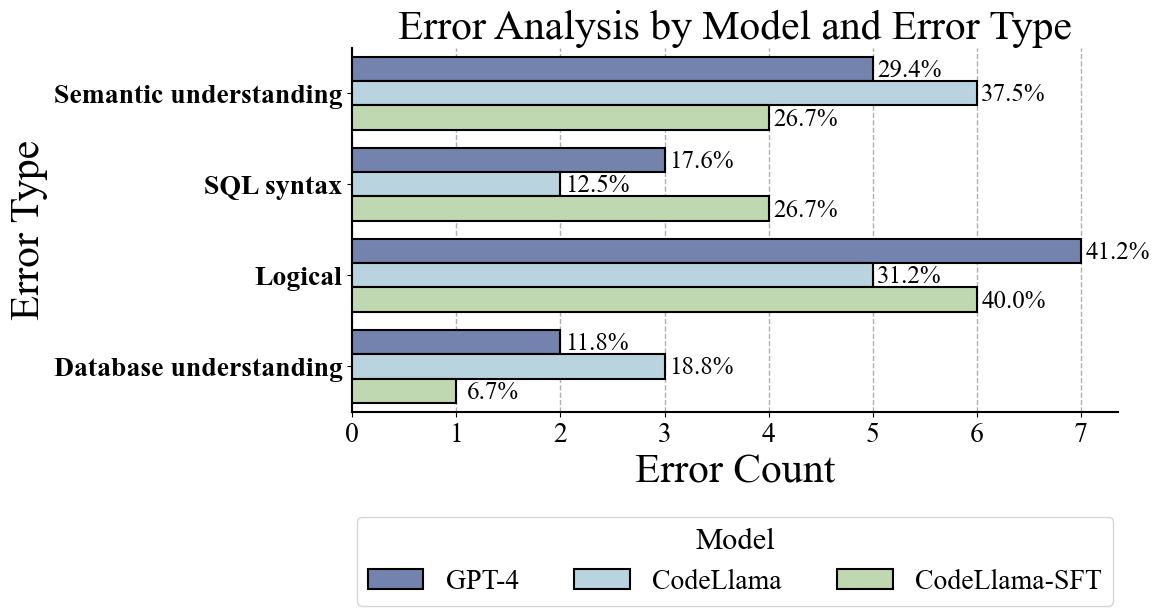

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 创建数据
data = {
    'Error Type': ['Semantic understanding', 'SQL syntax', 'Logical', 'Database understanding'],
    'GPT-4': [5, 3, 7, 2],
    'CodeLlama': [6, 2, 5, 3],
    'CodeLlama-SFT': [4, 4, 6, 1]
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 计算每个模型的总错误数
totals = df[['GPT-4', 'CodeLlama', 'CodeLlama-SFT']].sum()

# 计算百分比
percentages = df.copy()
for model in ['GPT-4', 'CodeLlama', 'CodeLlama-SFT']:
    percentages[model] = df[model] / totals[model] * 100

# 将数据转换为长格式
df_melt = df.melt(id_vars='Error Type', var_name='Model', value_name='Error Count')
percentages_melt = percentages.melt(id_vars='Error Type', var_name='Model', value_name='Percentage')

# 设置颜色
palette = {
    'GPT-4': '#6a7eb7', 
    'CodeLlama': '#b4d7e5', 
    'CodeLlama-SFT': '#bedeab'
}

# 设置字体和大小
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20  # Increase font size

# 设置画布大小
plt.figure(figsize=(12, 7))  # 拉长图表

# 绘制条形图
barplot = sns.barplot(data=df_melt, x='Error Count', y='Error Type', hue='Model', palette=palette, edgecolor='black', linewidth=1.5, zorder=10)

# 设置标题和标签
plt.title('Error Analysis by Model and Error Type', fontsize=30)
plt.xlabel('Error Count', fontsize=30)
plt.ylabel('Error Type', fontsize=30)

# 调整图例并放置在图表下方
plt.legend(title='Model', fontsize=20, title_fontsize=22, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=3)

# 添加边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# 设置纵轴标签加粗
plt.yticks(fontsize=20, fontweight='bold')

# 只显示纵轴网格线，并在最底层
plt.grid(True, axis='x', linestyle='--', linewidth=1, zorder=0)

# 在柱子右侧标注百分比
for index, row in percentages_melt.iterrows():
    bar = barplot.patches[index]
    percentage = row['Percentage']
    barplot.text(bar.get_width() + 0.35, bar.get_y() + bar.get_height() / 1.75, f'{percentage:.1f}%', color='black', ha="center", va='center', fontsize=18)

# 显示图表
plt.tight_layout()
plt.show()


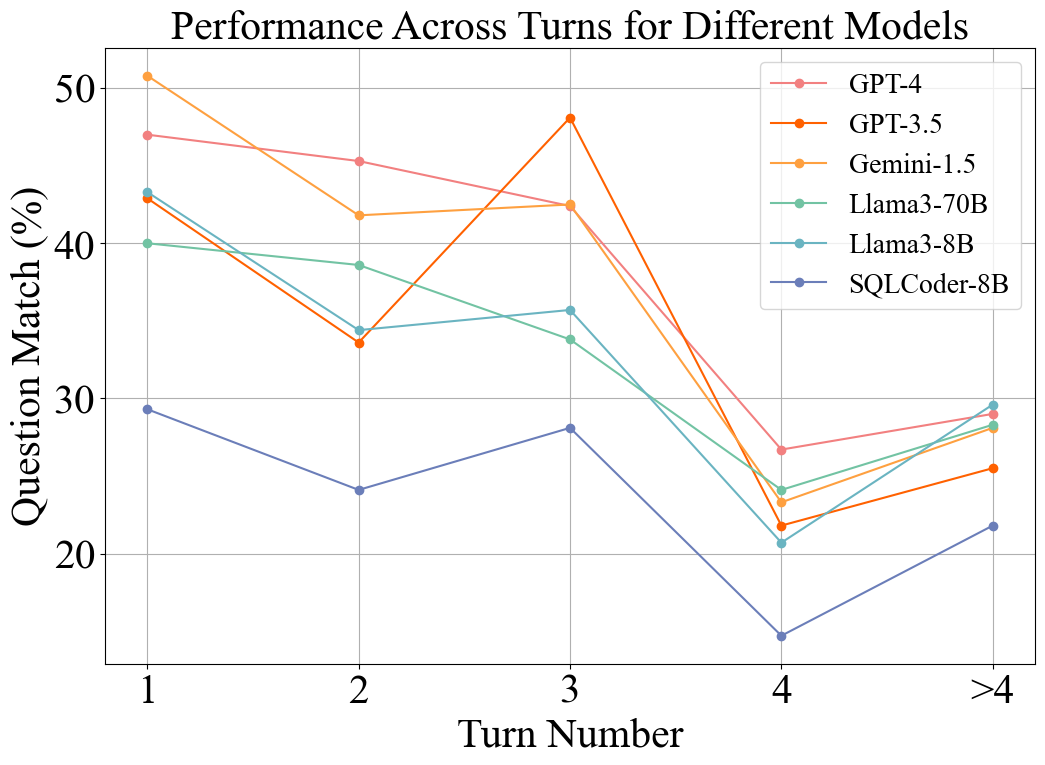

In [27]:
import matplotlib.pyplot as plt

models = ['SQLCoder-8B', 'Llama3-8B', 'Llama3-70B', 'Gemini-1.5', 'GPT-3.5', 'GPT-4']

turns = [1, 2, 3, 4,'>4']

scores = {
    'GPT-4': [47.0, 45.3, 42.4, 26.7, 29.0],
    'GPT-3.5': [42.9, 33.6, 48.1, 21.8, 25.5],
    'Gemini-1.5': [50.8, 41.8, 42.5, 23.3, 28.1],
    'Llama3-70B': [40.0, 38.6, 33.8, 24.1, 28.3],
    'Llama3-8B': [43.3, 34.4, 35.7, 20.7, 29.6],
    'SQLCoder-8B': [29.3, 24.1, 28.1, 14.7, 21.8]
}

colors = {
    'SQLCoder-8B': '#6B7EB9',  
    'Llama3-8B': '#6AB4C1', 
    'Llama3-70B': '#72C3A3', 
    'Gemini-1.5': '#FEA040',  
    'GPT-3.5': '#FF6100',      
    'GPT-4': '#F28080'       
}

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 30

plt.figure(figsize=(12, 8))

for model, score in scores.items():
    plt.plot(turns, score, marker='o', label=model, color=colors[model])

plt.xlabel('Turn Number', fontsize=30)
plt.ylabel('Question Match (%)', fontsize=30)
plt.title('Performance Across Turns for Different Models', fontsize=30)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()
